In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [46]:
train = pd.read_csv('extract_train_Jul08.csv')
train = train.drop(train.columns[0],axis = 1)
print(train.columns)

Index(['index', 'mean', 'std', 'skew', 'FFT_mean_real', 'FFT_mean_imag',
       'FFT_std_real', 'FFT_std_max', 'Roll_std_p05', 'Roll_std_p30',
       'Roll_std_p60', 'Roll_std_absDiff', 'Roll_mean_p05',
       'Roll_mean_absDiff', 'MFCC_mean02', 'MFCC_mean16'],
      dtype='object')


In [47]:
scaler=StandardScaler() #instantiate
scaler.fit(train) # compute the mean and standard which will be used in the next command
X_scaled=scaler.transform(train)

In [48]:
pca=PCA() 
pca.fit(X_scaled) 
X_pca=pca.transform(X_scaled)
# df = pd.DataFrame(X_pca[:,:9])
# df.to_csv('pca_exported_9features.csv')
#let's check the shape of X_pca array
#print("shape of X_pca", X_pca.shape)

In [49]:
ex_variance=np.var(X_pca,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
print(ex_variance_ratio)

[3.24171591e-01 1.80912999e-01 9.94731713e-02 6.82937797e-02
 6.65438721e-02 6.13776666e-02 5.88299153e-02 5.54410163e-02
 5.32393832e-02 1.87363718e-02 6.60387817e-03 2.83896504e-03
 2.22965948e-03 8.94915483e-04 3.72546331e-04 4.02690920e-05]


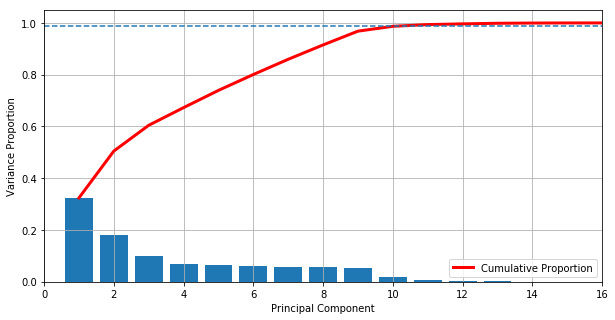

In [55]:
plt.figure(figsize=(10,5))
plt.bar(np.arange(1,17),pca.explained_variance_ratio_, linewidth=3)
plt.plot(np.arange(1,17),np.cumsum(pca.explained_variance_ratio_), linewidth=3, c = 'r', label = 'Cumulative Proportion')
plt.legend()
plt.xlim([0,16])
plt.xlabel('Principal Component')
plt.ylabel('Variance Proportion')
plt.grid()
plt.plot([0.99]*17, '--')
plt.savefig('principal_component_visualization.png')

In [56]:
ex_variance=np.var(X_pca,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
print(ex_variance_ratio)

[3.24171591e-01 1.80912999e-01 9.94731713e-02 6.82937797e-02
 6.65438721e-02 6.13776666e-02 5.88299153e-02 5.54410163e-02
 5.32393832e-02 1.87363718e-02 6.60387817e-03 2.83896504e-03
 2.22965948e-03 8.94915483e-04 3.72546331e-04 4.02690920e-05]


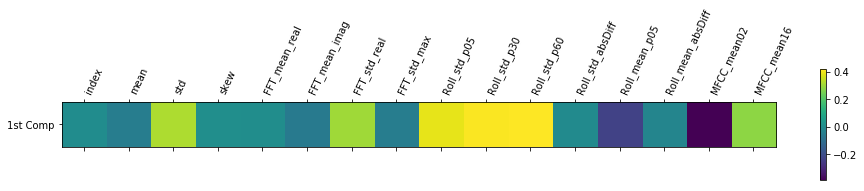

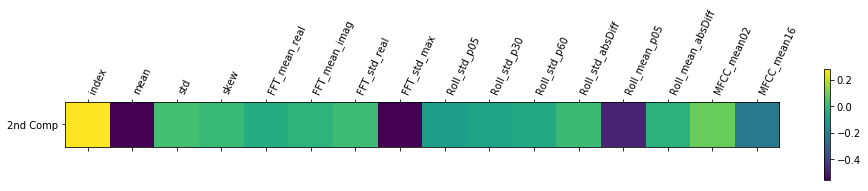

In [57]:
#plt.matshow(pca.components_,cmap='viridis')
#print(pca.components_[0])
plt.matshow([pca.components_[0]],cmap='viridis')
plt.yticks([0],['1st Comp'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(train.columns)),train.columns,rotation=65,ha='left')
plt.savefig('first_principal_component.png')
plt.show()

plt.matshow([pca.components_[1]],cmap='viridis')
plt.yticks([0],['2nd Comp'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(train.columns)),train.columns,rotation=65,ha='left')
plt.savefig('second_principal_component.png')
plt.show()

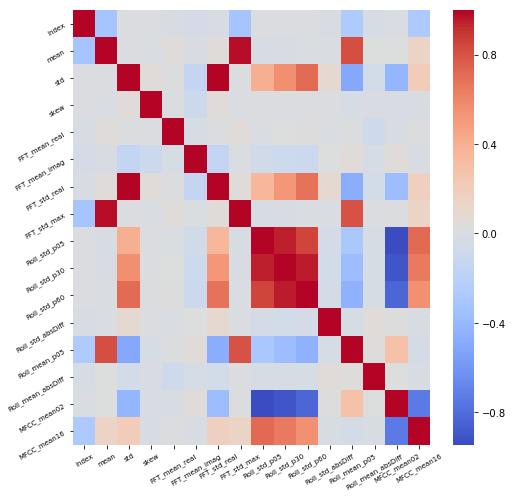

In [58]:
features = train.columns
import seaborn as sns

plt.figure(figsize=(8,8))
s=sns.heatmap(train.corr(),cmap='coolwarm') 
s.set_yticklabels(s.get_yticklabels(),rotation=30,fontsize=7)
s.set_xticklabels(s.get_xticklabels(),rotation=30,fontsize=7)
plt.savefig('heat_map.png')
plt.show()

In [59]:
a = np.abs(pca.components_[0])
a = a/np.max(a)
df = pd.DataFrame()
df['features'] = train.columns
df['importance'] = a
df.to_csv('PCA_extracted.csv')

In [60]:
pca=PCA(n_components = 9) 
pca.fit(X_scaled) 
X_pca=pca.transform(X_scaled)
df = pd.DataFrame(X_pca)
df.to_csv('pca_exported_9features.csv')